#Task 1: Define the Problem

### Choose the best model to predict the profit of a food truck based on this data set.

#Task 2a: Install the Needed Libraries

In [110]:
# Already installed

#Task 2b: Import the Needed Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR #Support Vector Regression

#Task 3: Load the Data

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/food_truck_data.txt')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [113]:
df.head()

# Only two columns of data.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


##Get Data Info

In [114]:
df.info()

# Small dataset with only 97 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


##Find Missing Values

In [115]:
df.isnull().sum()

# No Missing values

Population    0
Profit        0
dtype: int64

#Task 5: Perform Data Cleaning

In [116]:
# Data is clean

#Task 6: Visualize Cleaned up Dataset

Text(0.5, 1.0, 'Profit vs Population')

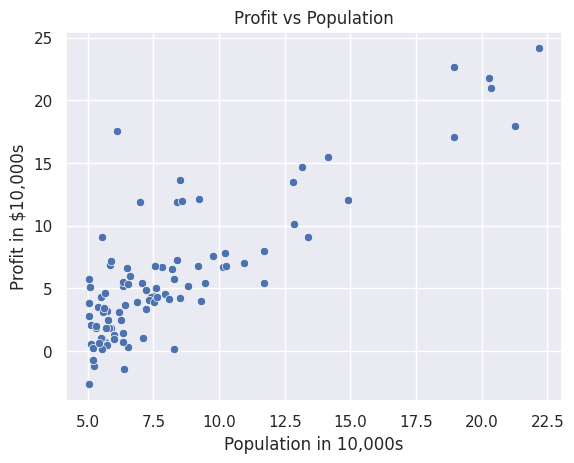

In [117]:
sns.scatterplot(x = 'Population', y = 'Profit', data = df)
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Profit vs Population")

Text(0.5, 12.44444444444443, 'Profit in $10,000s')

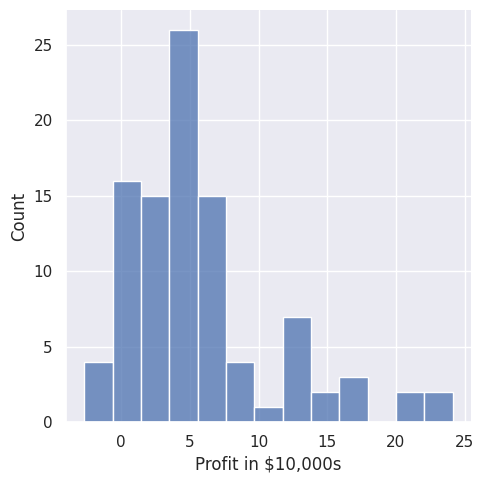

In [118]:
sns.displot(df['Profit'])
plt.xlabel("Profit in $10,000s")

# Histogram showing distribution of Profit

Text(0.5, 12.44444444444443, 'Population in 10,000s')

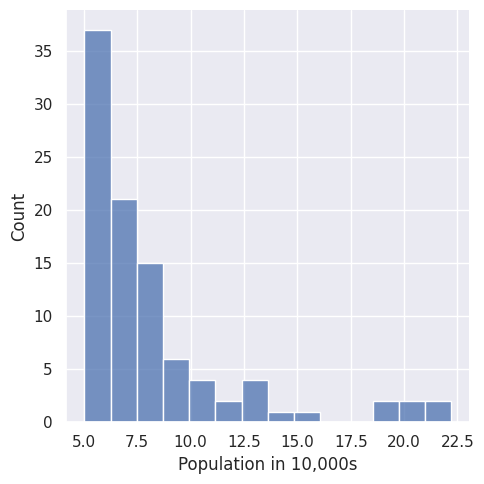

In [119]:
sns.displot(df['Population'])
plt.xlabel("Population in 10,000s")

# Histogram showing distribution of Population

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [120]:
x = df[['Population']].values
y = df['Profit'].values

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

#Task 9: Choose the ML Method to follow

In [122]:
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinearRegressor_model = LinearRegression()
SVR_model = SVR()

# Because we have to train 4 models, SVR selected as alternative to test.

#Task 10: Train the ML Model

In [123]:
models = [DecisionTree_model, RandomForest_model, LinearRegressor_model, SVR_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

# Train all four models using for loop.

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!
SVR() is trained!


#Task 11: Test the Model

In [124]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinearRegressor = LinearRegressor_model.score(x_test, y_test)
accuracy_SVR = SVR_model.score(x_test, y_test)

# Test models for accuracy using the x_test and y_test data.

In [125]:
models = {'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 'LinearRegressor_model': accuracy_LinearRegressor, 'SVR_Model': accuracy_SVR}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

# Print out the accuracy score for each model.

The accuracy score for the DecisionTree_model is 29.29%
The accuracy score for the RandomForest_model is 49.47%
The accuracy score for the LinearRegressor_model is 68.02%
The accuracy score for the SVR_Model is 46.98%


Text(0.5, 1.0, 'Profit vs Population')

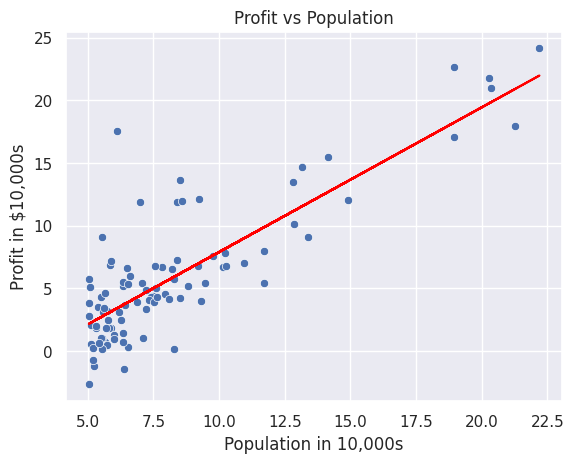

In [126]:
sns.scatterplot(x = 'Population', y = 'Profit', data = df)
plt.plot(x_train, LinearRegressor_model.predict(x_train), color = "red")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Profit vs Population")

# Plotting linear regression for practice.

# Exporting Model


### Choosing to export the linear regression model as it is the most accurate and the data only has one attribute.  

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
pickle.dump(LinearRegressor_model, open('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics Course/Projects/Food Truck Analysis/FoodTruckModel.pkl', 'wb'))